# Lab 1

In [2]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [12]:
import nltk
nltk.download('wordnet')       # for WordNetLemmatizer
nltk.download('omw-1.4')       # optional, for extra languages


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\himan\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\himan\AppData\Roaming\nltk_data...


True

In [13]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from nltk.stem import PorterStemmer, WordNetLemmatizer

## lab 2

In [18]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\himan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [20]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('WordNetLemmatizer')
nltk.download('PorterStemmer')
nltk.download('WordListCorpusReader')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\himan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\himan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading WordNetLemmatizer: Package
[nltk_data]     'WordNetLemmatizer' not found in index
[nltk_data] Error loading PorterStemmer: Package 'PorterStemmer' not
[nltk_data]     found in index
[nltk_data] Error loading WordListCorpusReader: Package
[nltk_data]     'WordListCorpusReader' not found in index


False

In [21]:
from collections import Counter
text='Apple is looking at buying a U.K. startup for $1 billion in London.'


text = 'Apple is looking at buying a U.K. startup for $1 billion in London.'

stop_words = set(stopwords.words("english"))
tokens = word_tokenize(text.lower())

filtered = [w for w in tokens if w.isalpha() and w not in stop_words]
freq = Counter(filtered)

print(freq.most_common(5))

[('apple', 1), ('looking', 1), ('buying', 1), ('startup', 1), ('billion', 1)]


In [22]:
# for stemming
from nltk.stem import PorterStemmer

porter_stemmer=PorterStemmer()
words=['progammer', 'program','programs','progamming']
stemming_words=[porter_stemmer.stem(word) for word in words]
print(words)
print(stemming_words)

['progammer', 'program', 'programs', 'progamming']
['progamm', 'program', 'program', 'progam']


In [23]:
d1='Today is Thursday.'
d2='I am in Indore'
d3='Potato is a mutual friend of every vegitable'

list_of_token=word_tokenize(d1+d2+d3)
stemming_words=[porter_stemmer.stem(word) for word in list_of_token]

### CountVectorizer

In [30]:
pip install "numpy<2"


Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import nltk
print(np.__version__)


1.26.4


In [3]:
from sklearn.feature_extraction.text import CountVectorizer

text = ['I live in Indore']
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(text)


print("Vocabulary:", vectorizer.vocabulary_)


Vocabulary: {'live': 2, 'in': 0, 'indore': 1}


### Lemmatizer

In [4]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\himan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize


In [8]:
sentence='i live in Indore Potato is a mutual friend of every vegitable'
lemmatizer = WordNetLemmatizer()
tokens = word_tokenize(sentence.lower())


lemmas = [lemmatizer.lemmatize(token) for token in tokens]

print("Original Tokens:", tokens)
print(lemmas)

Original Tokens: ['i', 'live', 'in', 'indore', 'potato', 'is', 'a', 'mutual', 'friend', 'of', 'every', 'vegitable']
['i', 'live', 'in', 'indore', 'potato', 'is', 'a', 'mutual', 'friend', 'of', 'every', 'vegitable']


### Tf-Idf Vector

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from joblib import dump, load
import pickle

In [10]:
documents = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?"
]

In [11]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(documents)

In [12]:
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

In [13]:
with open('tfidf_vectorizer.pkl', 'rb') as file:
    loaded_vectorizer_pickle = pickle.load(file)

In [14]:
dump(vectorizer, 'tfidf_vectorizer.joblib')

['tfidf_vectorizer.joblib']

In [15]:
loaded_vectorizer_joblib = load('tfidf_vectorizer.joblib')

In [16]:
new_documents = [
    "This is a new document.",
    "This document is different from the others."
]

In [17]:
X_new_pickle = loaded_vectorizer_pickle.transform(new_documents)

In [19]:
X_new_joblib = loaded_vectorizer_joblib.transform(new_documents)

In [20]:
print("Feature names:")
print(vectorizer.get_feature_names_out())

print("\nOriginal transformed data:")
print(X.toarray())

print("\nTransformed new data using loaded vectorizer from pickle:")
print(X_new_pickle.toarray())

print("\nTransformed new data using loaded vectorizer from joblib:")
print(X_new_joblib.toarray())

Feature names:
['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']

Original transformed data:
[[0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]
 [0.         0.6876236  0.         0.28108867 0.         0.53864762
  0.28108867 0.         0.28108867]
 [0.51184851 0.         0.         0.26710379 0.51184851 0.
  0.26710379 0.51184851 0.26710379]
 [0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]]

Transformed new data using loaded vectorizer from pickle:
[[0.         0.65416415 0.         0.53482206 0.         0.
  0.         0.         0.53482206]
 [0.         0.57684669 0.         0.47160997 0.         0.
  0.47160997 0.         0.47160997]]

Transformed new data using loaded vectorizer from joblib:
[[0.         0.65416415 0.         0.53482206 0.         0.
  0.         0.         0.53482206]
 [0.         0.57684669 0.         0.47160997 0.         0.
  0.47160997 0.         0.471

### Ngram

In [21]:
import nltk
from nltk.util import ngrams
from collections import Counter

text = "This is a sample sentence to demonstrate N-grams in NLP."
tokens = nltk.word_tokenize(text.lower())

unigrams = list(ngrams(tokens, 1))
print("Unigrams:", unigrams)

bigrams = list(ngrams(tokens, 2))
print("Bigrams:", bigrams)

trigrams = list(ngrams(tokens, 3))
print("Trigrams:", trigrams)

bigram_counts = Counter(bigrams)
print("\nBigram Counts:", bigram_counts.most_common(5))


Unigrams: [('this',), ('is',), ('a',), ('sample',), ('sentence',), ('to',), ('demonstrate',), ('n-grams',), ('in',), ('nlp',), ('.',)]
Bigrams: [('this', 'is'), ('is', 'a'), ('a', 'sample'), ('sample', 'sentence'), ('sentence', 'to'), ('to', 'demonstrate'), ('demonstrate', 'n-grams'), ('n-grams', 'in'), ('in', 'nlp'), ('nlp', '.')]
Trigrams: [('this', 'is', 'a'), ('is', 'a', 'sample'), ('a', 'sample', 'sentence'), ('sample', 'sentence', 'to'), ('sentence', 'to', 'demonstrate'), ('to', 'demonstrate', 'n-grams'), ('demonstrate', 'n-grams', 'in'), ('n-grams', 'in', 'nlp'), ('in', 'nlp', '.')]

Bigram Counts: [(('this', 'is'), 1), (('is', 'a'), 1), (('a', 'sample'), 1), (('sample', 'sentence'), 1), (('sentence', 'to'), 1)]


### Bow

In [22]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer

# Sample corpus
documents = [
    "This is a sample sentence",
    "This sentence is another example",
    "NLP is fun and powerful"
]

# Create the Bag of Words model
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)

# Feature names (unique words)
print("Vocabulary:", vectorizer.get_feature_names_out())

# Bag of Words matrix
print("BoW Matrix:\n", X.toarray())


Vocabulary: ['and' 'another' 'example' 'fun' 'is' 'nlp' 'powerful' 'sample' 'sentence'
 'this']
BoW Matrix:
 [[0 0 0 0 1 0 0 1 1 1]
 [0 1 1 0 1 0 0 0 1 1]
 [1 0 0 1 1 1 1 0 0 0]]


### One hot encoding

In [23]:
import nltk
from sklearn.preprocessing import LabelBinarizer

# Sample text
sentence = "NLP is fun"
tokens = nltk.word_tokenize(sentence.lower())

# One-hot encoding
encoder = LabelBinarizer()
one_hot = encoder.fit_transform(tokens)

print("Vocabulary:", encoder.classes_)
print("One Hot Encoding:\n", one_hot)


Vocabulary: ['fun' 'is' 'nlp']
One Hot Encoding:
 [[0 0 1]
 [0 1 0]
 [1 0 0]]


In [24]:
new_documents = [
    "This is a new document.",
    "This document is different from the others."
]
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)
with open('tfidf_vectorizer.pkl', 'rb') as file:
    loaded_vectorizer_pickle = pickle.load(file)
dump(vectorizer, 'tfidf_vectorizer.joblib')
loaded_vectorizer_joblib = load('tfidf_vectorizer.joblib')
new_documents = [
    "This is a new document.",
    "This document is different from the others."
]
X_new_pickle = loaded_vectorizer_pickle.transform(new_documents)
X_new_joblib = loaded_vectorizer_joblib.transform(new_documents)
print("Feature names:")
print(vectorizer.get_feature_names_out())

print("\nOriginal transformed data:")
print(X.toarray())

print("\nTransformed new data using loaded vectorizer from pickle:")
print(X_new_pickle.toarray())

print("\nTransformed new data using loaded vectorizer from joblib:")
print(X_new_joblib.toarray())


Feature names:
['and' 'another' 'example' 'fun' 'is' 'nlp' 'powerful' 'sample' 'sentence'
 'this']

Original transformed data:
[[0 0 0 0 1 0 0 1 1 1]
 [0 1 1 0 1 0 0 0 1 1]
 [1 0 0 1 1 1 1 0 0 0]]

Transformed new data using loaded vectorizer from pickle:
[[0 0 0 0 1 0 0 0 0 1]
 [0 0 0 0 1 0 0 0 0 1]]

Transformed new data using loaded vectorizer from joblib:
[[0 0 0 0 1 0 0 0 0 1]
 [0 0 0 0 1 0 0 0 0 1]]


### Lab 3

In [25]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

In [26]:
np.random.seed(42)
embeddings1 = np.random.rand(100, 51)  # First set: 100 samples, 50-dim each
embeddings2 = np.random.rand(100, 51) + 1

In [27]:
combined_embeddings = np.vstack([embeddings1, embeddings2])


In [28]:
np.shape(combined_embeddings)

(200, 51)

In [29]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
embeddings_2d = tsne.fit_transform(combined_embeddings)


In [30]:
labels = np.array([0] * len(embeddings1) + [1] * len(embeddings2))

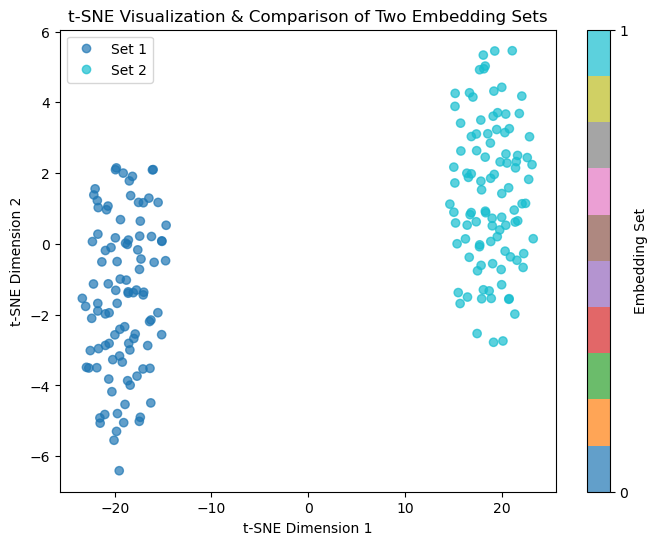

In [31]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    embeddings_2d[:, 0],
    embeddings_2d[:, 1],
    c=labels,
    cmap='tab10',
    alpha=0.7,
    label='Embeddings'
)
plt.legend(handles=scatter.legend_elements()[0], labels=['Set 1', 'Set 2'])
plt.title('t-SNE Visualization & Comparison of Two Embedding Sets')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar(scatter, ticks=[0, 1], label='Embedding Set')
plt.show()


In [1]:
pip install sentence-transformers


  Using cached sentence_transformers-5.1.1-py3-none-any.whl.metadata (16 kB)
  Using cached transformers-4.57.1-py3-none-any.whl.metadata (43 kB)
  Using cached torch-2.8.0-cp312-cp312-win_amd64.whl.metadata (30 kB)
  Using cached huggingface_hub-0.35.3-py3-none-any.whl.metadata (14 kB)
  Using cached tokenizers-0.22.1-cp39-abi3-win_amd64.whl.metadata (6.9 kB)
Using cached sentence_transformers-5.1.1-py3-none-any.whl (486 kB)
Using cached huggingface_hub-0.35.3-py3-none-any.whl (564 kB)
Using cached torch-2.8.0-cp312-cp312-win_amd64.whl (241.3 MB)
Using cached transformers-4.57.1-py3-none-any.whl (12.0 MB)
Using cached tokenizers-0.22.1-cp39-abi3-win_amd64.whl (2.7 MB)
Note: you may need to restart the kernel to use updated packages.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

c:\Users\himan\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\himan\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

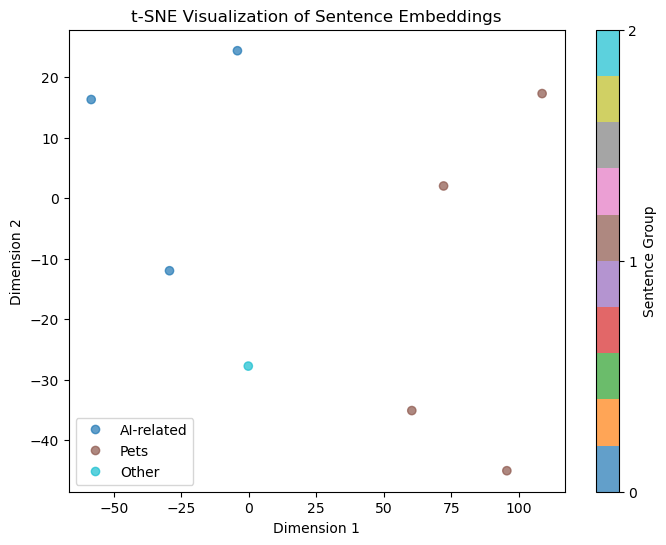

In [2]:
from sentence_transformers import SentenceTransformer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load a pre-trained sentence transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')  # Fast & popular model

# Step 2: Sample sentences for embedding
sentences = [
    "I love machine learning.",
    "The cat sat on the mat.",
    "Artificial intelligence is fascinating.",
    "Dogs are great pets.",
    "Deep learning transforms many fields.",
    "My dog loves playing fetch.",
    "Natural language processing is useful.",
    "Cats are very curious animals."
]

# Step 3: Generate embeddings
embeddings = model.encode(sentences)

# Optional: For demonstration, let's create labels (cats vs dogs vs AI)
labels = [0, 1, 2, 1, 0, 1, 0, 1]  # Just an example grouping

# Step 4: Apply t-SNE
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

# Step 5: Plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    embeddings_2d[:, 0],
    embeddings_2d[:, 1],
    c=labels,
    cmap='tab10',
    alpha=0.7
)
plt.legend(handles=scatter.legend_elements()[0], labels=['AI-related', 'Pets', 'Other'])
plt.title('t-SNE Visualization of Sentence Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(scatter, ticks=[0, 1, 2], label='Sentence Group')
plt.show()


In [1]:
print("hello")

hello
